User: 0. Cosine Similarity is: 0.9648024354866931
User: 0. Accuracy Correctness is: 1.0
User: 0. Accuracy Precision is: 0.7461703435
User: 1. Cosine Similarity is: 0.8033530081341895
User: 1. Accuracy Correctness is: 0.5
User: 1. Accuracy Precision is: 0.671832372
mean cosine similarity: 0.8840777218104413
mean accuracy (correctness): 0.75
mean accuracy (preciosn): 0.7090013577500001


Text(0,0.5,'Result')

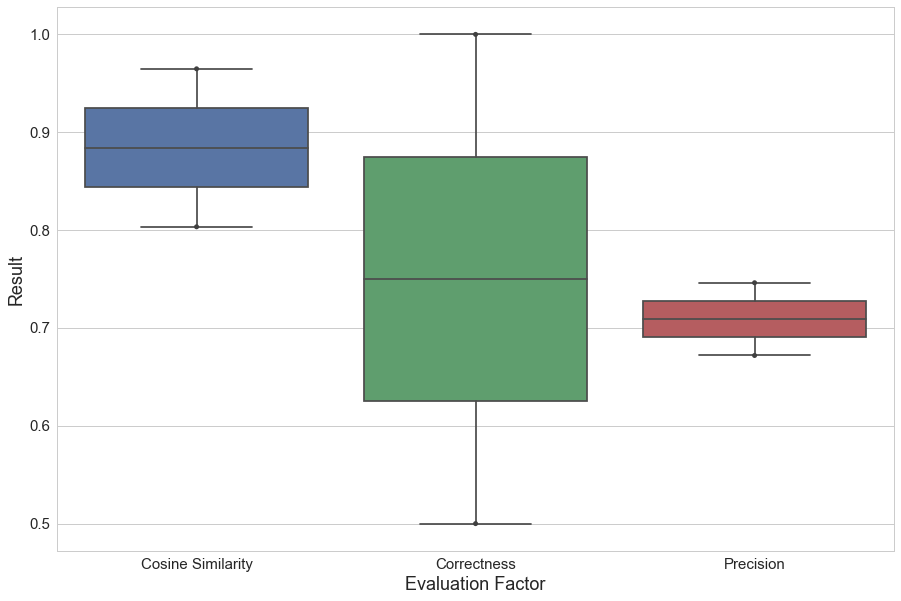

In [62]:
# cosine similarity

from scipy import spatial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import re
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None


def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)
    plt.xticks(range(3))
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)


def find_similarity(pred_prob, act_prob_all):
    result = 1 - spatial.distance.cosine(pred_prob, act_prob_all)
    return result


def total_variation_distance(pred_prob, act_prob_all):
    diff_sum = 0
    for i in range(0, len(pred_prob)):
        diff_sum = diff_sum + abs(pred_prob[i] - act_prob_all[i])
    diff_sum = diff_sum / 2
    return diff_sum


def accuracy(pred_prob, act_prob_all):
    acc = False
    if sum(pred_prob) != 0:
        # find the max in predicted list
        max_pred = max(pred_prob)
        max_pred_pos = [i for i, j in enumerate(pred_prob) if j == max_pred]

        # find max in ground truth list
        max_truth = max(act_prob_all)
        max_truth_pos = [i for i, j in enumerate(act_prob_all) if j == max_truth]

        # check if max prediction list and max ground truth list matches
        acc = not set(max_pred_pos).isdisjoint(max_truth_pos)
    return acc


# calculate prediction parameters
def check_pred(pred_prob, act_prob_all):
    global similarity_arr
    global precision_arr
    global correct_arr

    similarity = find_similarity(pred_prob, act_prob_all)
    similarity_arr = np.append(similarity_arr, similarity)

    # accuracy
    acc = accuracy(pred_prob, act_prob_all)
    correct_arr = np.append(correct_arr, acc)

    # total variation distance
    tot_var_dis = total_variation_distance(pred_prob, act_prob_all)
    precision_arr = np.append(precision_arr, 1 - tot_var_dis)


def predict(pred_prob, act_prob_all):
  
    check_pred(pred_prob, act_prob_all)


# --------------------------------------- MAIN ----------------------------------------------------------------
state_d_thrhld = 200
cos_sim_mean = []
cor_mean = []
pre_mean = []

similarity_arr = []
precision_arr = []
correct_arr = []

for i in range(0, 2):
    
    if i == 1:
        pred_prob = [0.00875796, 0.121859868, 0.161236694, 0.023526779, 0.127399684,
                 0.203548137, 0.185466149, 0.039402641, 0.051224659, 0.07757743]
        act_prob_all = [0.142478058, 0.11724775, 0.175961273, 0.101985833, 0.176049509,
                    0.026563589, 0.001201422, 0.002758433, 0.089368578, 0.166385553]
    else:
        pred_prob = [0.703125, 0.078125, 0.078125, 0.0390625, 0.015625, 0.0078125, 0, 0.0390625, 0.015625, 0.0234375]
        act_prob_all = [0.784313725, 0.019607843, 0, 0, 0, 0, 0, 0, 0, 0.196078431]
    
    predict(pred_prob, act_prob_all)

    user = str(i)
    # save similarity mean in a text file for each user
    if len(similarity_arr) != 0:
        similarity_arr = similarity_arr[np.logical_not(np.isnan(similarity_arr))]
        sim_mean = np.mean(similarity_arr)
        print("User: " + user + ". Cosine Similarity is: " + str(sim_mean))
        cos_sim_mean.append(sim_mean)

    # calculate mean of accuracy and distance variation for each user
    if len(correct_arr) != 0:
        print("User: " + user + ". Accuracy Correctness is: " + str(np.mean(correct_arr)))
        cor_mean.append(np.mean(correct_arr))
    if len(precision_arr) != 0:
        print("User: " + user + ". Accuracy Precision is: " + str(np.mean(precision_arr)))
        pre_mean.append(np.mean(precision_arr))

sum_df = pd.DataFrame()

if len(cos_sim_mean) != 0:
    cos_sim_mean = [x for x in cos_sim_mean if str(x) != 'nan']
    print("mean cosine similarity: " + str(sum(cos_sim_mean) / len(cos_sim_mean)))

if len(cor_mean) != 0:
    print("mean accuracy (correctness): " + str(sum(cor_mean) / len(cor_mean)))

if len(pre_mean) != 0:
    print("mean accuracy (preciosn): " + str(sum(pre_mean) / len(pre_mean)))

summ_df= pd.DataFrame({'Cosine Similarity': cos_sim_mean, 'Correctness': cor_mean, 'Precision': pre_mean})
summ_df = pd.melt(summ_df, value_vars=['Cosine Similarity', 'Correctness', 'Precision'])
summ_df.columns = ['Factor', 'Mean Value']
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.boxplot(x="Factor", y="Mean Value", data=summ_df)
ax = sns.swarmplot(x="Factor", y="Mean Value", data=summ_df, color=".25")
ax.tick_params(labelsize=15)
plt.xlabel("Evaluation Factor", fontsize = 18)
plt.ylabel("Result", fontsize = 18)